In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
class Kernel:
    def __init__(self, n) -> None:
        self.n = n #number of points

    def GaussianRbf(self, sig): # kernel exponentiel

        # code pas optimisé du tout,
        g_kern = np.zeros((self.n, self.n))
        for t in range(self.n):
            for s in range(self.n):
                g_kern[t, s] = np.exp(-np.power(t-s, 2)/(2*sig**2))

        return g_kern
    
def SimulateAR1(phi, sigma, n):

    # start from arbitrarly poinr
    x = np.random.random(size=(n,))
    for t in range(1, n):
        x[t] = np.random.normal(phi * x[t-1], sigma)
    return x

In [27]:
n = 1000

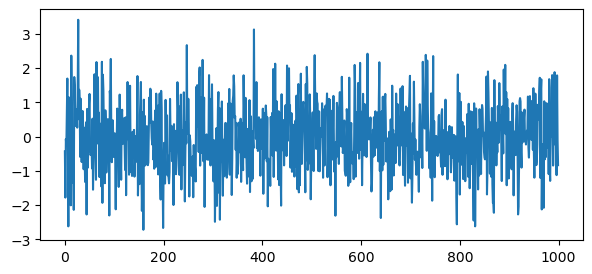

In [10]:
# processus iid
plt.figure(figsize=(7, 3))
K = Kernel(n).GaussianRbf(sig=0.01)
L = np.linalg.cholesky(K)
# simulate stochastic process with covariance K
eps_ = np.dot(L, np.random.randn(n))  
plt.plot(eps_)

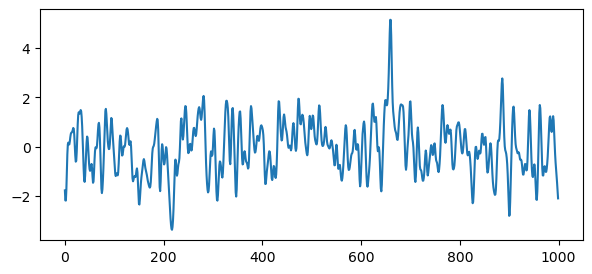

In [6]:
# processus non iid
plt.figure(figsize=(7, 3))
K = Kernel(n).GaussianRbf(sig=3)
L = np.linalg.cholesky(K)
# simulate stochastic process with covariance K
eps_ = np.dot(L, np.random.randn(n))  
plt.plot(eps_)

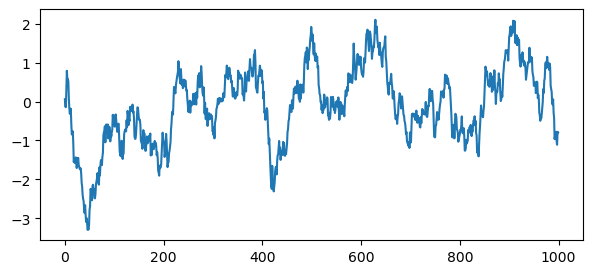

In [42]:
plt.figure(figsize=(7, 3))
eps_ = SimulateAR1(phi=0.99, sigma=1/5, n=1000)
plt.plot(eps_)

In [7]:
estimators

[-0.03742778408108589,
 -0.039454928031733866,
 -0.021606057975834866,
 -0.007935265895905657,
 -0.0360488040018067]